In [1]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
import random as rm
import pymc
import arviz as az
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Bayesian is not the opposite of frequentist, but it holds a contrasting view comparing with frequentists.

In the first chapter, we review Bayes' Theorem and provide an overview of application in statistics and econometrics.

If all you want know is what Bayesian framework is, this is the only chapter you need to read.

# <font face="gotham" color="orange"> Bayesian Theory </font>

The bayesian theory is built upon the most famous **Bayes' Theorem**, which is derived from condition probability and joint probability.

The **law of joint probability** says that
$$
P(x, y)=P(x \mid y) P(y)
$$
or 
$$
P(x, y)=P(y \mid x) P(x)
$$
Combine them, we will obtain the formula of Bayes' Theorem.
$$
P(x \mid y)=\frac{P(y \mid x) P(x)}{P(y)}
$$

To make it meaningful in the context of statistics/econometrics, replace the symbols will provide a refreshing view
$$
P(\theta \mid Y)=\frac{P(Y \mid \theta) P(\theta)}{P(Y)}
$$
where $Y$ is the data, $\theta$ is the vector of parameters you would like to make inferrence. The formula summarizes what we know about $\theta$ about having seen the sample of observations on $Y$.

In Bayesian terms
\begin{align}
\text{prior:}&\ P(\theta)\\
\text{likelihood:}&\ P(Y|\theta)\\
\text{marginal likelihood:}&\ P(Y)\\
\text{posterior:}&\ P(\theta|Y)\\
\end{align}

To update prior beliefs into posterior beliefs conditional on observed data, the process is called **Bayesian Inference**.

More often, we ignore $P(Y)$ due to its irrelevance to $\theta$, the formula simplies into
$$
P(\theta \mid Y) \propto P(Y \mid \theta) P(\theta)
$$

# <font face="gotham" color="orange"> Model Comparison </font>

If you have multiple models in mind, Bayesian framework can provide model comparison too. Suppose we have $m$ different models, $M_i$ for $i=1, ..., m$, the posterior for the parameters calculated using $M_i$ is 
$$
P\left(\theta^{i} \mid Y, M_{i}\right)=\frac{P\left(Y \mid \theta^{i}, M_{i}\right) P\left(\theta^{i} \mid M_{i}\right)}{P\left(Y \mid M_{i}\right)}
$$

We use $i$ to signal that for each model has its own posterior, likelihood and prior.

However, to compare models, we need to evaluate the **posterior model probability**
$$
\operatorname{P}\left(M_{i} \mid Y\right) \propto P\left(Y \mid M_{i}\right) \operatorname{P}\left(M_{i}\right),
$$

Suppose there are two competing models, the **posterior odds ratio** is constructed as
$$
\frac{P\left(M_{1} \mid Y\right)}{P\left(M_{2} \mid Y\right)}=\frac{P\left(Y \mid M_{1}\right)}{P\left(Y \mid M_{2}\right)} \frac{P\left(M_{1}\right)}{P\left(M_{2}\right)}
$$
Specifically, this part is called **Bayes factor**
$$
BF_{12}=\frac{P\left(Y \mid M_{1}\right)}{P\left(Y \mid M_{2}\right)} 
$$
which is a the ratio of _marginal likelihoods_ for model $1$ and model $2$. Furthermore, marginal likelihood can be decomposed into
$$
P\left(Y \mid M_{i}\right)=\int_{\theta_{i}} P\left(Y \mid \theta_{i}, M_{i}\right) P\left(\theta_{i} \mid M_{i}\right) d \theta_{i}
$$

# <font face="gotham" color="orange"> Bernoulli Example </font>

## <font face="gotham" color="orange"> Likelihood </font>

An example will help clarify how we use the Bayes' Theorem for inference and prediction. 

The Bernoulli PMF is commonly written as
$$
f(k; p) = p^{k}(1-p)^{1-k}\ \text{ for }\ \ k\in \{0, 1\}
$$
Watch out for the notation, that $k$ equals either $0$ or $1$, not $k \in (0, 1)$.

The meaning of $0$ and $1$ usually represent "happened" and "not happened". Now suppose we have collects a sample $K= (k_1, k_2, k_3,...,k_T)$. 

The joint Bernoulli PMF is the multiplication of them due to independence assumption
$$
f(K|p)=p^{k_1}(1-p)^{1-k_1}p^{k_2}(1-p)^{1-k_2}p^{k_3}(1-p)^{1-k_3}...p^{k_T}(1-p)^{1-k_T}=p^{\sum_{i=0}^T k_i}(1-p)^{T-\sum_{i=0}^T k_i}
$$

which is the **likelihood function** given all possible $p$.

## <font face="gotham" color="orange"> Prior </font>

We need **prior** too.

The most frequently used prior in Bayesian inference is **Beta distribution**, because it naturally models the _probability of a probability_. 

For instance, you can ask a question, what's the probability that a random person has diabetes? You could give an educated guess around $30\%$, then you go to collect data on the street that asking random person provide a blood sample test.

Recall that we have mentioned pdf of Beta distribution
\begin{equation}
f(p, \alpha, \beta)=\frac{\Gamma(\alpha+b) p^{\alpha-1}(1-p)^{\beta-1}}{\Gamma(\alpha) \Gamma(\beta)}
\end{equation}
However in Bayesian inference, we usually combine those gamma functions into a beta function term.
\begin{equation}
f(p, \alpha, \beta)=\frac{1}{B(\alpha, \beta)} p^{\alpha-1}(1-p)^{\beta-1}
\end{equation}


## <font face="gotham" color="orange"> Posterior </font>

Posterior is straightforward by evoking Bayes' Theorem.
$$
f(p|K) \propto \left(p^{\sum_{i=0}^T k_i}(1-p)^{T-\sum_{i=0}^T k_i}\right)\frac{1}{B(\alpha_0, \beta_0)} p^{\alpha_0-1}(1-p)^{\beta_0-1}
$$
where subscript $0$ represent **prior**.

Since we have already using $\propto$, we only need to keep the kernel of beta distribution, which simplifies to
$$
f(p|K) \propto \left(p^{\sum_{i=0}^T k_i}(1-p)^{T-\sum_{i=0}^T k_i}\right) p^{\alpha_0-1}(1-p)^{\beta_0-1}
$$
Collect terms we obtain the kernel of posterior distribution, which is also a beta distribution!
$$
f(p|K) \propto p^{\sum_{i=0}^T k_i+\alpha_0-1}(1-p)^{T-\sum_{i=0}^T k_i+\beta_0-1}
$$

We will see more detailed examples in next chapter, we just derived posterior analytically by using **conjugate prior**, whose posterior takes the same function form, but with updated parameters. 

In this case the posterior parameters are updated to
$$
\alpha=\sum_{i=0}^T k_i+\alpha_0\\
\beta=T-\sum_{i=0}^T k_i+\beta_0
$$

## <font face="gotham" color="orange"> Plug in Numbers </font>

Let's plug in some numbers for the parameters and try plotting the distribution. 

The beta distribution models our prior belief, let's say the parameters are set as
$$
\alpha_0 = 4\\
\beta_0 = 7
$$
The sample is 
$$
K= (1, 0, 0, 0, 1, 0, 1, 1, 0, 0)
$$
whose sample size is $T=10$. Therefore the posterior parameters are
$$
\alpha = 4+4=8\\
\beta=10-4+7=13
$$
Plot prior and posterior together. 

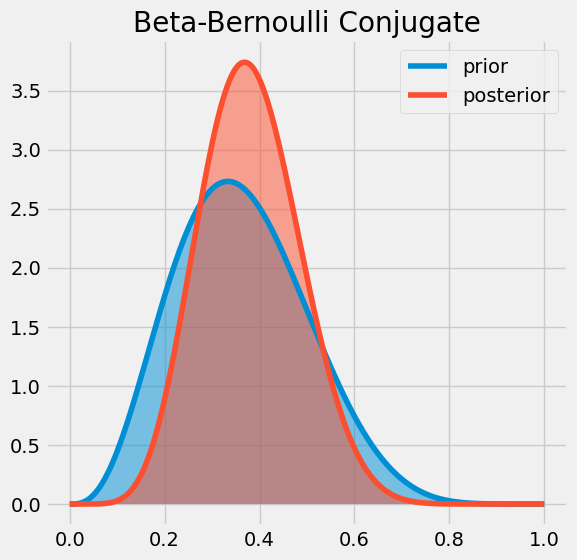

In [2]:
x_beta = np.linspace(0, 1, 200)
y_beta_prior = sp.stats.beta(a=4, b=7).pdf(x_beta)
y_beta_posterior = sp.stats.beta(a=8, b=13).pdf(x_beta)

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(x_beta, y_beta_prior, label='prior')
ax.fill_between(x_beta, y_beta_prior, alpha=.5)
ax.plot(x_beta, y_beta_posterior, label='posterior')
ax.fill_between(x_beta, y_beta_posterior, alpha=.5)
ax.set_title('Beta-Bernoulli Conjugate')
ax.legend()
plt.show()

## <font face="gotham" color="orange"> Coin Example </font>

Throwing coins is a perfect illustration for Bayesian conjugates with Bernoulli likelihood. Suppose you suspect a coin is unfair, which means not the usual $50/50$ chances. 

You can have any theory you want, here we have function for plot example plots that you can define your prior for Beta distribution namely $\alpha_0$ and $\beta_0$, also you can determine if the coin is really unfair by tweaking probability of success in Bernoulli function, we named it ```fairness```, a fair coin would have it equal to $.5$.

In [3]:
def plot_coins_with_prior(a_prior, b_prior, fairness):
    number_of_trials = [0, 5, 15, 20, 30, 100]
    x = np.linspace(0, 1, 100)
    plt.figure(figsize=(16, 7))
    for i, N in enumerate(number_of_trials):
        heads = np.sum(sp.stats.bernoulli.rvs(p=fairness, size=N))
        ax = plt.subplot(int(len(number_of_trials)/3), 3, i + 1)
        ax.set_title('{} trials, {} heads'.format(N, heads))

        plt.xlabel('$P(H)$, Probability of Heads')
        plt.ylabel('Density')
        if i == 0:
            plt.ylim([0.0, 2.0])
        plt.setp(ax.get_yticklabels(), visible=False)

        y = sp.stats.beta.pdf(x, heads + a_prior, N - heads + b_prior) # post_a = sum of heads + 1,  post_b = times - sum of heads + 1
        plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads), color='orange')
        plt.fill_between(x, 0, y, color="tomato", alpha=0.7)
    plt.suptitle(r'Hyperparameters: $\alpha_0={},\beta_0={}$, Likelihood parameter p={}'\
                 .format(a_prior, b_prior, fairness),\
                 size=23)
    plt.tight_layout(pad=.6)
    plt.show()

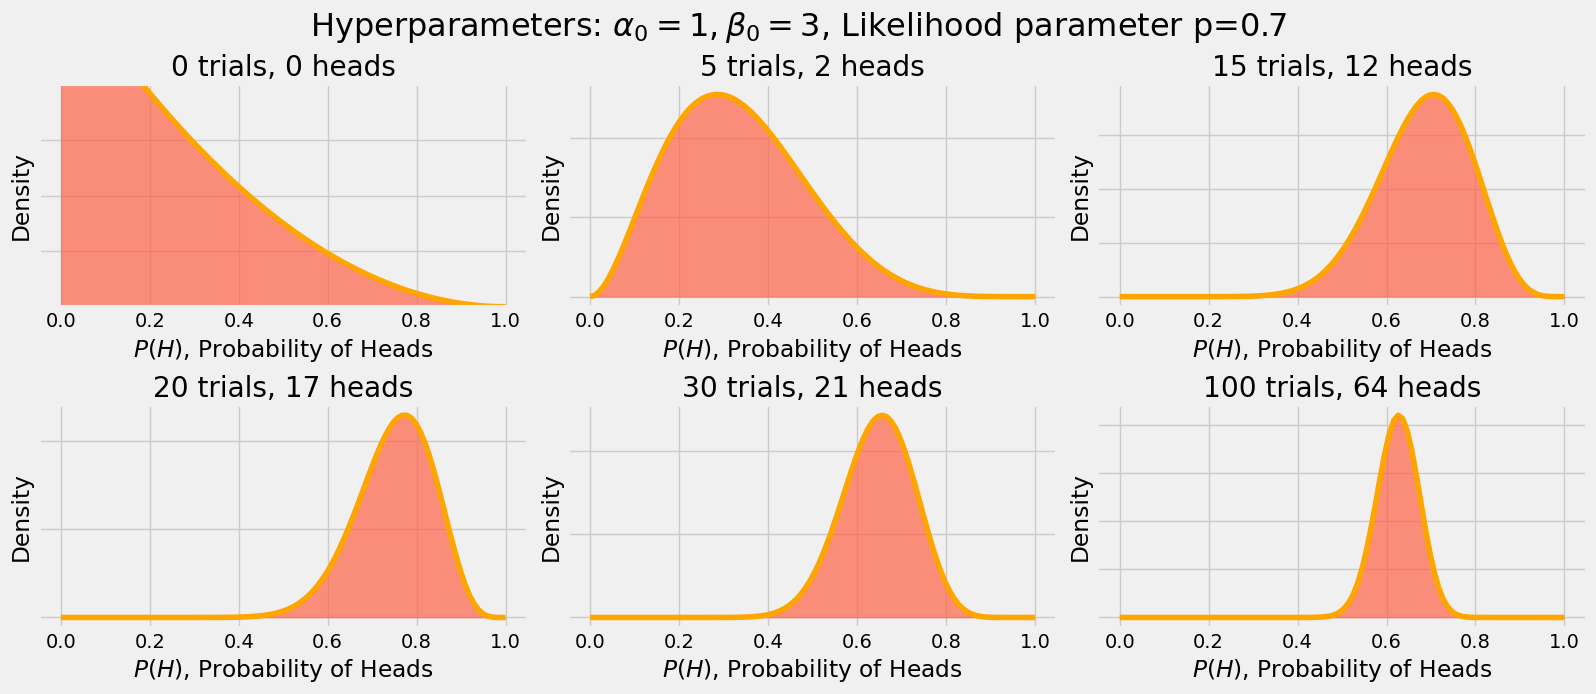

In [4]:
plot_coins_with_prior(a_prior=1, b_prior=3, fairness=.7)

## <font face="gotham" color="orange"> Reporting Results  </font>

We can provide numerical features of posterior distribution such as mean and standard deviation as **point estimates**. Because the posterior are not simulated, we have formula for mean and variance which can be found from any textbook or Wikipedia.
$$
\mathrm{E}[X]=\frac{\alpha}{\alpha+\beta}\\
\operatorname{var}[X]=\frac{\alpha \beta}{(\alpha+\beta)^{2}(\alpha+\beta+1)}
$$

In [5]:
a, b = 8, 13
mean_post = a/(a+b)
std_post =  (a*b)/((a+b)**2*(a+b+1))
print('mean of posterior: {}'.format(mean_post))
print('std of posterior: {}'.format(std_post))

mean of posterior: 0.38095238095238093
std of posterior: 0.010719439290867862


**Bayesian Credible Interval** is another common statistic that usually provided in some statistic software. The Bayesian Credible Interval differs the Frequentist Confidence Interval mostly in a philosophical sense.

Frequentists assume the parameters are fixed but confidence intervals are random, so $95\%$ confidence interval means if the experiment repeats $100$ times, there are round $95$ times the confidence interval will include the true parameter. 

However Bayesian holds a contrasting view that parameters are random, but the credible intervals are fixed. As an example, the shaded are is the $95\%$ credible interval. It indicates that there is $95\%$ chance the interval include the true parameter.

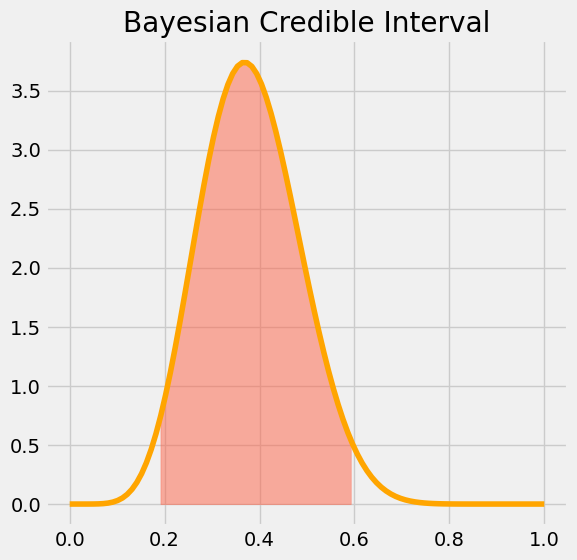

In [6]:
lb = sp.stats.beta(a=8, b=13).ppf(.025)
ub = sp.stats.beta(a=8, b=13).ppf(.975)
x_ci = np.linspace(lb, ub, 100)
y_ci = sp.stats.beta(a=8, b=13).pdf(x_ci)

x_beta = np.linspace(0, 1, 100)
y_beta_posterior = sp.stats.beta(a=8, b=13).pdf(x_beta)

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(x_beta, y_beta_posterior, color='orange')
ax.fill_between(x_ci, y_ci, color='tomato', alpha=.5)

ax.set_title('Bayesian Credible Interval')
plt.show()

# <font face="gotham" color="orange"> Numerical Methods  </font>

Most of time you won't achieve an analytical form of posterior, this is where computer simulation comes in.

There are mainly two categories of numerical methods for Bayesian posterior simulation, i.e. **Markovian** and **Non-Markovian** methods. The former is the industrial standard for Bayesian framework, the latter is easier to intuitive and code-friendly too. 

We will illustrate some examples of Non-Markovian examples, in later chapters, we will go in to depth of Markovian methods.

## <font face="gotham" color="orange"> Grid Computing </font>

Grid computing is a straightforward brute-force approach, you basically sample the probability density or mass function of priors and likelihood, then you obtain posterior by multiplying them.

Here we also use the coin-flipping example, but note that we change from flipping once to multiple times, naturally the binomial distribution will replace Bernoulli.

The algorithm is very intuitive
1. You define equidistant range for prior.
2. Calculate mass or density for each point (grids).
3. Multiply likelihood and prior.

In [7]:
def posterior_grid_coins(grid_points, heads, tosses, alpha, beta):
    grid = np.linspace(0, 1, grid_points)
    prior = sp.stats.beta(a=alpha, b=beta).pdf(grid)
    prior = prior/np.sum(prior)
    likelihood = sp.stats.binom.pmf(heads, tosses, grid)
    posterior = (likelihood * prior)/np.sum(likelihood * prior) # normalize the unit
    return grid, prior, posterior

In [8]:
grid_points, heads, tosses, alpha, beta = 100, 25, 100, 6, 8
grid, prior, posterior = posterior_grid_coins(grid_points, heads, tosses, alpha, beta)

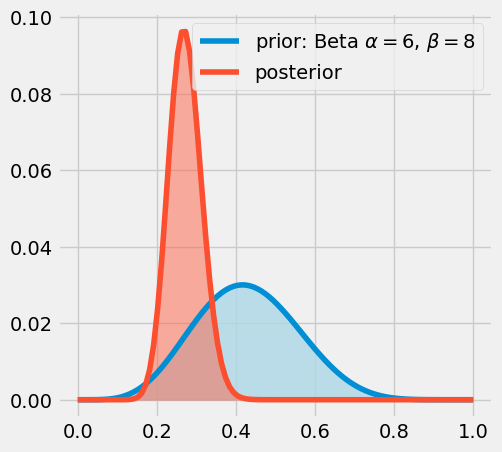

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(grid, prior, label=r'prior: Beta $\alpha={}$, $\beta={}$'.format(alpha, beta))
ax.fill_between(grid, prior, color='lightblue', alpha=.8)

ax.plot(grid, posterior, label ='posterior')
ax.fill_between(grid, posterior, color='tomato', alpha=.5)
ax.legend()
plt.show()

However fast and simple, this method is not practical in higher dimension due to **curse of dimensionality**. This is easier to understand with our example here, we have $100$ grid points for one dimension distribution, if we use the same amount of grid points for two dimension distribution the grid points will be $10000$, basically $N^p$, where $N$ is number of grid point for each variable, $p$ is the dimension or the number of random variables. To sample every also require to increase the number of samples to increase exponentially, which is not feasible in practical modelling.

Hence it is rarely a serious sampling tool rather a pedagogical gimmick.

## <font face="gotham" color="orange"> Quadratic Method </font>

It's also called **Laplace approximation**, but more commonly called **quadratic method** which tells the essential part of the algorithm.

If the posterior $p(\theta)$ is a uni-modal distribution, the area around the mode usually are very close to a Gaussian distribution $q(\theta)$ (go check all the posterior plots above and down). Theoretically, the posterior is asymptotically normal as the sample size goes to infinity.  

Once we find the mode, we measure the curvature around it (with _Hessian matrix_), equivalent to say that a rough estimate of $\mu$ and $\sigma$ of the posterior. To be specific, the algorithm follows two steps

1. Find the mode of $p(\theta)$, the mode of posterior has Latin name **Maximum a-posteriori**, denoted by $\hat{\theta}_{MAP}$. We use it as the $\mu$ of $q(\theta)$.
2. Measure the curvature near the mode of $p(\theta)$ and use it to computer the $\sigma$ of $q(\theta)$.

For analytical purpose, some prefer to take log of posterior, therefore the area near the mode become a quadratic function which can be approximated by your chosen quadratic function.

The question now boils down to how to find the mode? If the posterior density function is $p(\theta|y)$, we take the Taylor expansion of its log form centered at $\hat{\theta}_{MAP}$
$$
\log p(\theta \mid y)=\log p(\hat{\theta} \mid y)+\frac{1}{p(\hat{\theta} \mid y)}(\theta-\hat{\theta})+\frac{1}{2}(\theta-\hat{\theta})^{T}\left[\frac{d^{2}}{d \theta^{2}} \log p(\theta \mid y)\right]_{\theta=\hat{\theta}}(\theta-\hat{\theta})+\ldots
$$

Actually $\frac{1}{p(\hat{\theta} \mid y)}=0$, because it's the derivative at the $\hat{\theta}_{MAP}$. So it safely simplies to
$$
\begin{align}
\log p(\theta \mid y)&=\log p(\hat{\theta} \mid y)+\frac{1}{2}(\theta-\hat{\theta})^{T}\left[\frac{d^{2}}{d \theta^{2}} \log p(\theta \mid y)\right]_{\theta=\hat{\theta}}(\theta-\hat{\theta})+\ldots\\
&=\log p(\hat{\theta} \mid y)+\frac{1}{2}(\theta-\hat{\theta})^{T}\boldsymbol{H}_{\theta=\hat{\theta}}(\theta-\hat{\theta})+\ldots
\end{align}
$$
where $\boldsymbol{H}$ is the Hessian matrix. Use the Hessian in the approximation Gaussian $q(\theta)$

$$
q(\theta)=\frac{|\boldsymbol{H}|^{1 / 2}}{(2 \pi)^{N / 2}} \exp \left[-\frac{1}{2}\left(\theta-\hat{\theta}\right)^T \boldsymbol{H}\left(\theta-\hat{\theta}\right)\right]
$$

The notation clearly shows that $\boldsymbol{H}=\boldsymbol{\Sigma}^{-1}$, therefore the inverse of Hessian, i.e. $\boldsymbol{H}^{-1}$ is the covariance matrix of $q(\theta)$.

We won't go into much details here. There is ```pymc3.find_MAP()``` to obtain the $\hat{\theta}_{MAP}$.

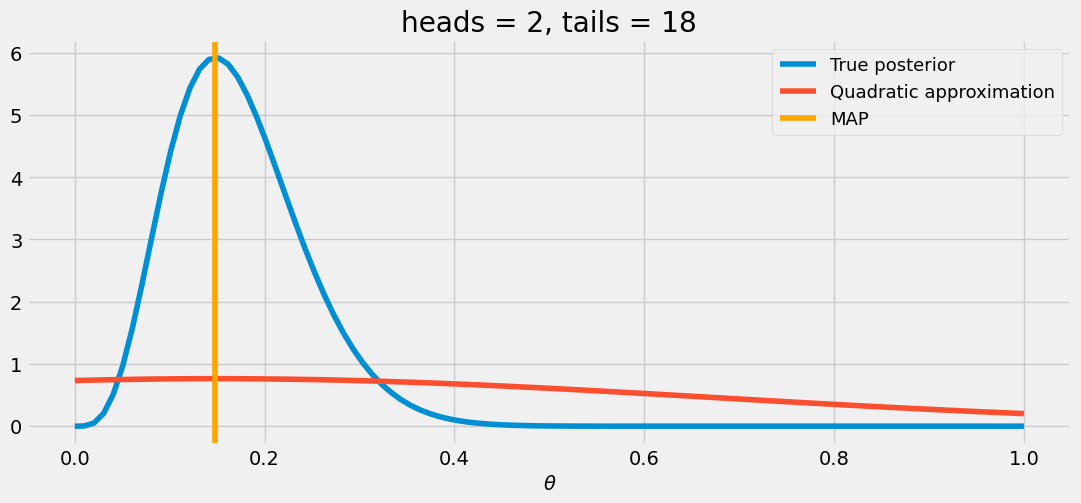

In [10]:
coin_data = sp.stats.bernoulli(p=.1).rvs(size=20)
head = coin_data.sum()
tail = len(coin_data) - head

alpha_0, beta_0 = 3, 6
with pymc.Model() as normal_approximation:
    p = pymc.Beta('p', alpha_0, beta_0)
    w = pymc.Binomial('w',n=1, p=p, observed=coin_data)
    mean_q = pymc.find_MAP()
    std_q = ((1/pymc.find_hessian(mean_q, vars=[p]))**0.5)[0]
MAP, sig = mean_q['p'], std_q

fig, ax = plt.subplots(figsize=(12, 5))
# Use analytical posterior conjugacy
x = np.linspace(0, 1, 100)
ax.plot(x, sp.stats.beta(a=head+alpha_0, b=tail+beta_0).pdf(x), label='True posterior') 
 
# laplace approximation
ax.plot(x, sp.stats.norm(loc=MAP, scale=sig).pdf(x),label='Quadratic approximation')
ax.axvline(x=MAP, label='MAP', color='orange')
ax.legend(loc=0, fontsize=13)
 
ax.set_title('heads = {}, tails = {}'.format(head, tail))
ax.set_xlabel(r'$\theta$', fontsize=14)
plt.show()

## <font face="gotham" color="orange"> Metropolis Algo </font>

The simplest Markov Chain Monte Carlo is Metropolis algorithm. We will demonstrate the mechanism of it to sample a known distribution, which we pretend we know nothing of it. This has nothing to do with Bayesian estimation at all.

We need an initial value to start the chain, like we said, we know its median, so that could be the starting point, but even if we know nothing about it, we can make a guess too, just make sure the initial value fits in the range of the prior.

Each new probability value will be evaluated by an acceptance rule.

This will be the acceptance rule we use
$$
p_a = \frac{p^{ }_{new}}{p^{ }_{old}}
$$
then compare $p_a$ with a random draw from a uniform distribution.

If $p_a$ larger than uniform draw, we accept it, otherwise we retreat to previous probability.

Note that uniform distribution is always less than $1$, hence if $p^{ }_{new} > p^{ }_{old}$ we acceptance with $100\%$. If $p_a=.8$, we have a $80\%$ chance of accepting it.

In [11]:
def metropolis(function, steps):
    sample = np.zeros(steps)
    old_x = .1 # [0, 1], if we use beta distribution
    old_prob = function.pdf(old_x) # calculate probability 
    for i in range(steps):
        new_x = old_x + np.random.normal(0, 1) # give the previous value a disturbance, we use Gaussian
        new_prob = function.pdf(new_x) # update the probability
        acceptance = new_prob/old_prob # this is the acceptance rule
        if acceptance >= np.random.random():
            sample[i] = new_x
            old_x = new_x
            old_prob = new_prob
        else:
            sample[i] = old_x
    return sample

In [12]:
function = sp.stats.beta(2, 3)
steps = 50000
samples = metropolis(function, steps)

pdf_curve = function.pdf(np.linspace(0, 1))

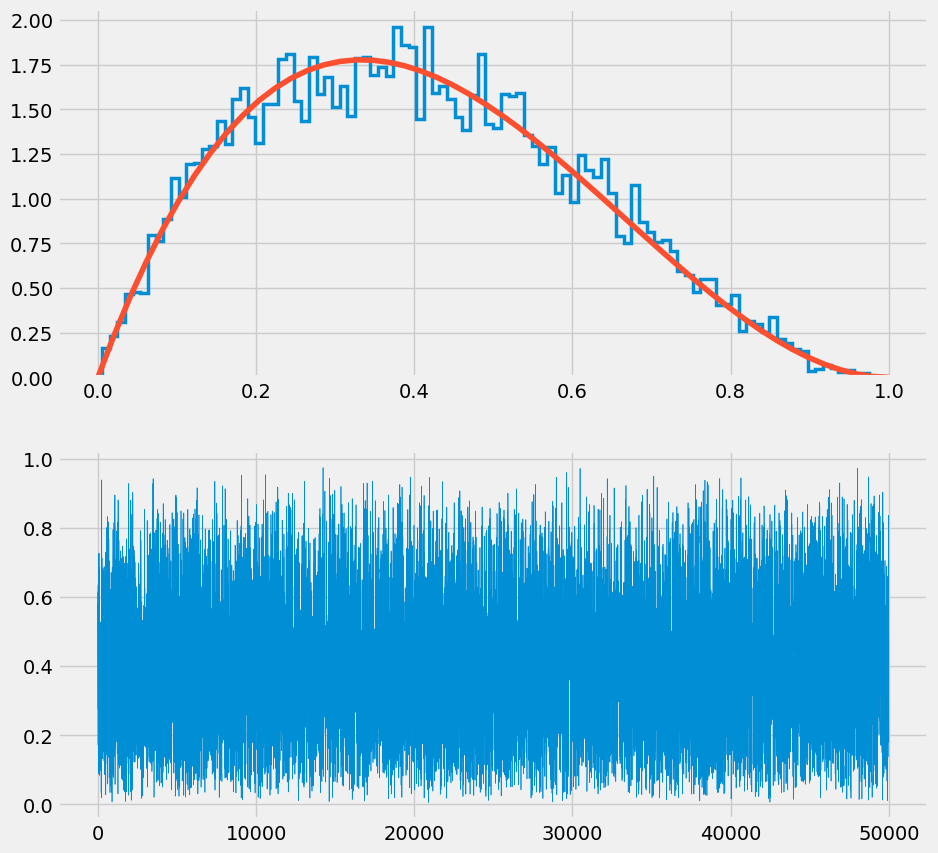

In [13]:
fig, ax = plt.subplots(figsize=(10, 10), ncols=1, nrows=2)
ax[0].hist(samples, bins=100, density=True, histtype='step', lw=2.5)
ax[0].plot(np.linspace(0, 1), pdf_curve)
ax[1].plot(samples, lw=.5)
plt.show()

The upper chart is sampled distribution, lower chart is called the **trace**. 

We will discuss more MCMC methods such as Metropolis and Gibs Sampler in more details later. Here is an excellent reference material for visualizing the algorithm: https://chi-feng.github.io/mcmc-demo/

## <font face="gotham" color="orange"> No U-Turn Sampler </font>

The **No U-Turn Sampler** (NUTS) belongs to a bigger category which is called **Hamiltonian Monet Carlo** (HMC), which is actually very similar to **Metropolis-Hastings algorithm** (details in MCMC chapter, you can come bakc here after studying MCMC chapter), the key difference is the proposal distribution. 

But the intuition is extremely straightforward, watch the animation here: http://arogozhnikov.github.io/2016/12/19/markov_chain_monte_carlo.html. 

Imagine a bi-variate distribution which will can illustrated by 3D plot, the distribution will look like any terrain you have seen on a map, but upside down. Then a frictionless ball that follows the physical rule will be kicked to random direction, we record the location of ball after a pre-determined time say 3 seconds (you can choose any duration, but for the sake of efficiency, it should be too long or too short.) 

The intuition is that the ball will always tend to trace out lower area, in this case we flip the distribution upside down, which is the high density area. 

However HMC requires tuning parameters, but its close kin NUTS has free us from fiddling parameters, which is more accessible for broader background of users.

## <font face="gotham" color="orange"> Short Introduction of PyMC3 </font>

In this section, we give a brief introduction to PyMC3 library which specializes in Bayesian probabilistic programming. 

The example shows running a Markov Chain Monte Carlo (MCMC) to simulate the posterior of coins flipping example, this is for pure demonstration purpose, because we have discussed that the model has conjugate priors which guarantees an analytical form of posterior. 

Recall that in the coin example we have Bayesian formula 
$$
f(p|K) = f(K|p) f(p)
$$
where 
$$
f(p)\sim \text{Beta}(\alpha, \beta)\\
f(K|p) \sim \text{Bernoulli}(n, k)
$$
or rewrite them as
$$
\theta\sim \text{Beta}(\alpha, \beta)\\
y \sim \text{Bernoulli}(n, \theta)
$$

The Python codes in ```pymc``` basically follow the same way as the mathematical expression, this is the basic feature of probabilistic programming.

In [14]:
with pymc.Model() as test_model:
    theta = pymc.Beta(r'$\theta$', alpha=1, beta=1)
    likelihood = pymc.Bernoulli('likelihood', p=theta, observed=coin_data)
    trace = pymc.sample(draws=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$\theta$]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 25 seconds.


If you don't assign any specific algorithm for posterior sampling, **No U-Turn Sampler** (NUTS) will be default algorithm, which would perform better with continous distribution, because the algorithm require computing gradients in each sampled point.

The result shows ```1000 tune```(burn-in, will be discarded) and ```2000 draw```, add up together we obtain 3000 draws for each chain, for two chains, we get $6000$, which is the reason showing ```6000/6000```.

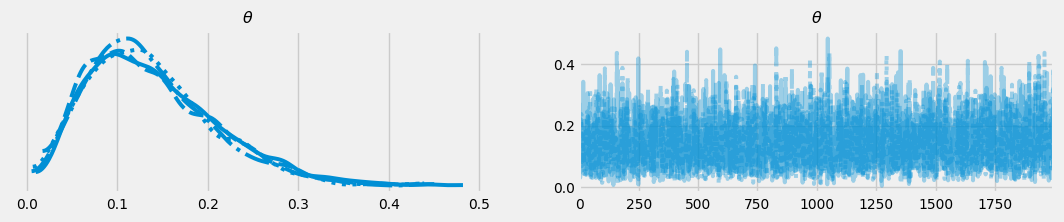

In [15]:
az.plot_trace(trace); plt.show()

In [16]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
$\theta$,0.138,0.07,0.021,0.266,0.001,0.001,3204.0,4492.0,1.0
